In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from DecisionTreeRegressor import DecisionTreeRegressor as MyDecisionTreeRegressor
from RandomForestRegressor import RandomForestRegressor as MyRandomForestRegressor
%matplotlib inline

In [2]:
boston = load_boston()
X = boston.data
y = boston.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=97)

In [5]:
%%time
depths = []
train_scores = []
scores = []

for depth in range(1, 12):
    DTR = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=2)
    depths.append(depth)
    DTR.fit(X_train, y_train)
    train_scores.append(DTR.score(X_train, y_train))
    scores.append(DTR.score(X_test, y_test)) 

print(max(scores))

0.891990857891
CPU times: user 19.6 ms, sys: 1.41 ms, total: 21 ms
Wall time: 23.6 ms


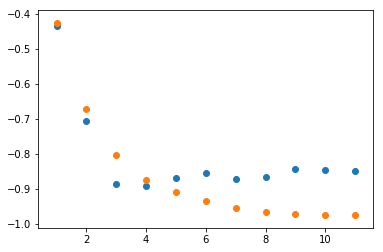

In [6]:
plt.scatter(depths, [-1 * score for score in scores])
plt.scatter(depths, [-1 * score for score in train_scores])

In [7]:
%%time
depths = []
train_scores = []
scores = []

MyDTR = MyDecisionTreeRegressor()
for depth in range(1, 12):
    depths.append(depth)
    MyDTR.fit(X_train, y_train, max_depth=depth)
    train_scores.append(MyDTR.score(X_train, y_train))
    scores.append(MyDTR.score(X_test, y_test))

print(max(scores))

0.88495505558
CPU times: user 35.2 s, sys: 311 ms, total: 35.5 s
Wall time: 37.7 s


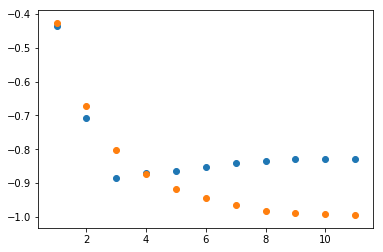

In [8]:
plt.scatter(depths, [-1 * score for score in scores])
plt.scatter(depths, [-1 * score for score in train_scores])

In [9]:
%%time
depths = []
train_scores = []
scores = []

for depth in range(1, 12):
    RFR = RandomForestRegressor(max_depth=depth, n_estimators=10, bootstrap=True, max_features='auto')
    depths.append(depth)
    RFR.fit(X_train, y_train)
    train_scores.append(RFR.score(X_train, y_train))
    scores.append(RFR.score(X_test, y_test))

print(max(scores))

0.931981758695
CPU times: user 206 ms, sys: 2.13 ms, total: 208 ms
Wall time: 212 ms


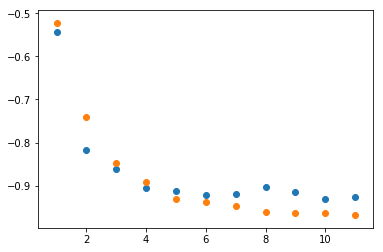

In [10]:
plt.scatter(depths, [-1 * score for score in scores])
plt.scatter(depths, [-1 * score for score in train_scores])

In [11]:
%%time
depths = []
train_scores = []
scores = []

MyRFR = MyRandomForestRegressor()
for depth in range(1, 12):
    depths.append(depth)
    MyRFR.fit(X_train, y_train, max_depth=depth, n_estimators=10, n_features='all')
    train_scores.append(MyRFR.score(X_train, y_train))
    scores.append(MyRFR.score(X_test, y_test))

print(max(scores))

0.883072387858
CPU times: user 4min 32s, sys: 2.27 s, total: 4min 34s
Wall time: 4min 56s


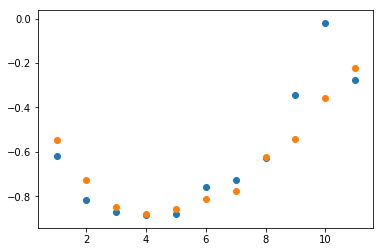

In [12]:
plt.scatter(depths, [-1 * score for score in scores])
plt.scatter(depths, [-1 * score for score in train_scores])

In [26]:
idx = np.random.randint(0, X_train.shape[0], X_train.shape[0])

In [27]:
%%time
depths = []
train_scores = []
scores = []

for depth in range(1, 12):
    DTR = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=2)
    depths.append(depth)
    DTR.fit(X_boot, y_boot)
    train_scores.append(DTR.score(X_boot, y_boot))
    scores.append(DTR.score(X_test, y_test)) 

print(max(scores))

0.864335397542
CPU times: user 26.7 ms, sys: 1.08 ms, total: 27.8 ms
Wall time: 27.8 ms


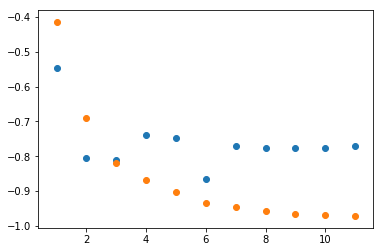

In [28]:
plt.scatter(depths, [-1 * score for score in scores])
plt.scatter(depths, [-1 * score for score in train_scores])

In [29]:
%%time
depths = []
train_scores = []
scores = []

MyDTR = MyDecisionTreeRegressor()
for depth in range(1, 12):
    depths.append(depth)
    MyDTR.fit(X_boot, y_boot, max_depth=depth)
    train_scores.append(MyDTR.score(X_boot, y_boot))
    scores.append(MyDTR.score(X_test, y_test))

print(max(scores))

0.818090998803
CPU times: user 26.6 s, sys: 191 ms, total: 26.7 s
Wall time: 27.5 s


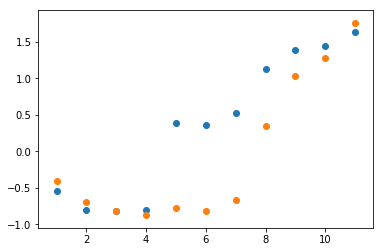

In [30]:
plt.scatter(depths, [-1 * score for score in scores])
plt.scatter(depths, [-1 * score for score in train_scores])

In [20]:
X_train[0], y_train[0]

(array([  1.49320000e-01,   2.50000000e+01,   5.13000000e+00,
          0.00000000e+00,   4.53000000e-01,   5.74100000e+00,
          6.62000000e+01,   7.22540000e+00,   8.00000000e+00,
          2.84000000e+02,   1.97000000e+01,   3.95110000e+02,
          1.31500000e+01]), 18.699999999999999)

In [21]:
X_train.shape

(354, 13)

In [22]:
X_train[idx].shape

(354, 13)

In [20]:
X_boot = np.take(X_train, idx, axis=0)
y_boot = np.take(y_train, idx)

In [21]:
X_boot.shape

(354, 13)